In [1]:
# Reference 
# 1. https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html
#2. https://learnopencv.com/contour-detection-using-opencv-python-c/
#3. Dr. Akhtar Jamil Lecture Morphological Porcessing Code
#4. https://stackoverflow.com/questions/48145096/draw-an-arc-by-using-end-points-and-bulge-distance-in-opencv-or-pil

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import math as m
import traceback

<h1>Question 1</h1>

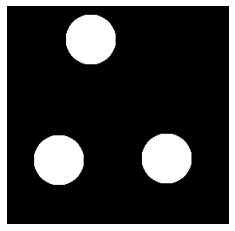

In [3]:
#Q1
path1 = r'F:\Study\Fall 2021\DIP\Assignments\3\data\img1.png' #path for image
img1 = cv2.imread(path1, cv2.IMREAD_COLOR) #reading image
img1blur = cv2.GaussianBlur(img1,(3,3),1.0) #applying guassian blut
img1gray =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY) #converting image to gray scale
threshold, img1bw = cv2.threshold(img1gray, 90, 255, cv2.THRESH_BINARY)  #thresh holding the image 
plt.imshow(img1bw,cmap='gray') #showing thresh holded image
plt.axis('off')
plt.show()

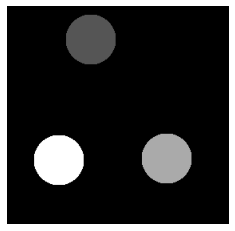

In [4]:
objects, img1_label = cv2.connectedComponents(img1bw) #openCV function to label objects in a binray image
temp = np.zeros_like(img1_label) #making a new empty image
plt.imshow(img1_label,cmap='gray') #showing labelled image
plt.axis('off')
plt.show()

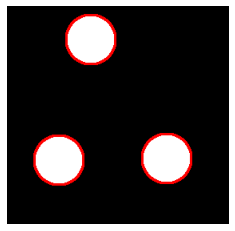

In [5]:
img1copy=img1.copy() #making copy if original image
contours, hierarchy = cv2.findContours(img1bw,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) #finding contours
cv2.drawContours(img1copy,contours,-1,(0,0,255),2) #drawing contours on copied image
img1copy =  cv2.cvtColor(img1copy,cv2.COLOR_BGR2RGB) #converting copies image to RGB
plt.imshow(img1copy) #showing image with contours drawn
plt.axis('off')
plt.show()

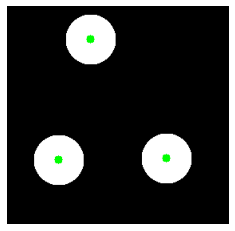

In [6]:
temp = img1.copy() #making copy of original image
for i in range(len(contours)): #loop running untill numbers of object in image
    M = cv2.moments(contours[i]) #openCV function to find moments
    x = int(M["m10"] / M["m00"]) #finding x cordinate centroid
    y = int(M["m01"] / M["m00"]) #finding y cordinate centroid
    cv2.circle(temp, (x, y), 5, (0, 255, 0), -1) #drawing circle on centroid 
plt.imshow(temp) #shwoing image with ceontroids drawn
plt.axis('off')
plt.show()

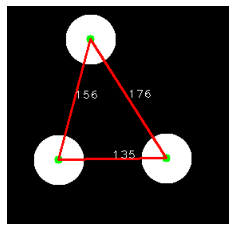

In [7]:
for i in range(len(contours)): #running loop on all contours
    next_id=i+1; #varibale used to store next contour
    if(next_id==len(contours)): #if next contours is the last contour
        next_id=0 #then next contours is the first contour
    M = cv2.moments(contours[i]) #calculating moments of current contour
    start_x = int(M["m10"] / M["m00"]) #x centroid of current contour
    start_y = int(M["m01"] / M["m00"]) #y centroid of current contours
    M = cv2.moments(contours[next_id]) #calculating moments of next contour
    end_x = int(M["m10"] / M["m00"]) #x centroid of next contour
    end_y = int(M["m01"] / M["m00"]) #y centroid of next contour
    cv2.line(temp,(start_x,start_y),(end_x,end_y),(255,0,0),2) #drawing line between current contour and next contour
    distance=int(m.sqrt((end_x-start_x)*(end_x-start_x)+(end_y-start_y)*(end_y-start_y))) #find Eucleadian distance between current contour centroid and next contour centoid
    midx=(end_x+start_x)//2 #find middle x point between 2 contours
    midy=(end_y+start_y)//2 #finding middle y point between 2 contours
    strdistance=str(distance) #converting distance to string
    cv2.putText(temp,strdistance,(midx,midy),cv2.FONT_HERSHEY_PLAIN,1,(255,255,255),1) #showing distance using openCV putText function
plt.imshow(temp) #shwoing image with lines and distance 
plt.axis('off')
plt.show()

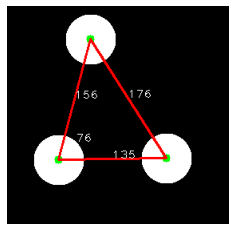

In [8]:
ar=np.zeros(len(contours)) #making a array of size = number of detected objects
for i in range(len(contours)): #loop for each contour
    next_id=i+1; #varibale used to store next contour
    if(next_id==len(contours)):#if next contours is the last contour
        next_id=0 #then next contours is the first contour
    M = cv2.moments(contours[i])#calculating moments of current contour
    start_x = int(M["m10"] / M["m00"])#x centroid of current contour
    start_y = int(M["m01"] / M["m00"])#y centroid of current contours
    M = cv2.moments(contours[next_id])#calculating moments of next contour
    end_x = int(M["m10"] / M["m00"])#x centroid of next contour
    end_y = int(M["m01"] / M["m00"])#y centroid of next contour
    slope1=(end_x-start_x)/(end_y-start_y) #calculating slope of ith line
    ar[i]=abs(slope1) #storing slope value in ar array
theta=m.atan((ar[0]-ar[2])/(1-(ar[0]*ar[2]))) #calcualting angle between first line and its adjacent line using tan inevers formula with slope
degree=m.degrees(abs(theta)) #converting angle from radians to degrees
degree=round(degree) #rouding off degree
M = cv2.moments(contours[0]) #calculating moments of first object
end_x = int(M["m10"] / M["m00"]) #finding x centroid of first contour
end_y = int(M["m01"] / M["m00"]) #finding y centroid of first contours
cv2.putText(temp,str(degree),(end_x+22,end_y-22),cv2.FONT_HERSHEY_PLAIN,1,(255,255,255),1) #showing angle
plt.imshow(temp)
plt.axis('off')
plt.show()

In [9]:
#I got this code from stackoverflow to draw an arc
def convert_arc(pt1, pt2, sagitta):

    # extract point coordinates
    x1, y1 = pt1
    x2, y2 = pt2

    # find normal from midpoint, follow by length sagitta
    n = np.array([y2 - y1, x1 - x2])
    n_dist = np.sqrt(np.sum(n**2))

    if np.isclose(n_dist, 0):
        # catch error here, d(pt1, pt2) ~ 0
        print('Error: The distance between pt1 and pt2 is too small.')

    n = n/n_dist
    x3, y3 = (np.array(pt1) + np.array(pt2))/2 + sagitta * n

    # calculate the circle from three points
    # see https://math.stackexchange.com/a/1460096/246399
    A = np.array([
        [x1**2 + y1**2, x1, y1, 1],
        [x2**2 + y2**2, x2, y2, 1],
        [x3**2 + y3**2, x3, y3, 1]])
    M11 = np.linalg.det(A[:, (1, 2, 3)])
    M12 = np.linalg.det(A[:, (0, 2, 3)])
    M13 = np.linalg.det(A[:, (0, 1, 3)])
    M14 = np.linalg.det(A[:, (0, 1, 2)])

    if np.isclose(M11, 0):
        # catch error here, the points are collinear (sagitta ~ 0)
        print('Error: The third point is collinear.')

    cx = 0.5 * M12/M11
    cy = -0.5 * M13/M11
    radius = np.sqrt(cx**2 + cy**2 + M14/M11)

    # calculate angles of pt1 and pt2 from center of circle
    pt1_angle = 180*np.arctan2(y1 - cy, x1 - cx)/np.pi
    pt2_angle = 180*np.arctan2(y2 - cy, x2 - cx)/np.pi

    return (cx, cy), radius, pt1_angle, pt2_angle


In [10]:
#I got this code from stackoverflow to draw an arc
def draw_ellipse(
        img, center, axes, angle,
        startAngle, endAngle, color,
        thickness=1, lineType=cv2.LINE_AA, shift=10):
    # uses the shift to accurately get sub-pixel resolution for arc
    # taken from https://stackoverflow.com/a/44892317/5087436
    center = (
        int(round(center[0] * 2**shift)),
        int(round(center[1] * 2**shift))
    )
    axes = (
        int(round(axes[0] * 2**shift)),
        int(round(axes[1] * 2**shift))
    )
    return cv2.ellipse(
        img, center, axes, angle,
        startAngle, endAngle, color,
        thickness, lineType, shift)

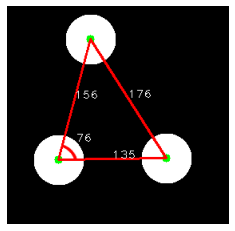

In [11]:
pt2 = (70, 175) #first point to start arc 
pt1 = (85, 190) #end point to end arc 
sagitta = 50 #curve of arc
center, radius, start_angle, end_angle = convert_arc(pt1, pt2, sagitta) #calling convert_arc function defined above
axes = (radius, radius) #axis
draw_ellipse(temp, center, axes, 0, start_angle, end_angle, (255,0,0),2) #calling draw_elipse function defined above to draw the arc
plt.imshow(temp) #shwoing the image with arc
plt.axis('off')
plt.show()

<h1>Question 2</h1>

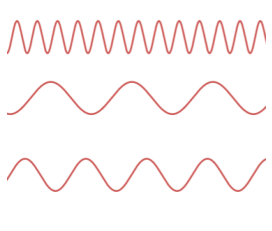

In [12]:
#Q2
path2 = r'F:\Study\Fall 2021\DIP\Assignments\3\data\img2.png' #image path
img2 = cv2.imread(path2, cv2.IMREAD_COLOR) #reading image
img2blur = cv2.GaussianBlur(img2,(3,3),1.0) #applying guassian blur
img2gray =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY) #converting image to gray scale
threshold, img2bw = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY)   #thresh holding the image
img2rgb =  cv2.cvtColor(img2,cv2.COLOR_BGR2RGB) #converting image to rgb
plt.imshow(img2rgb) #showing image
plt.axis('off')
plt.show()

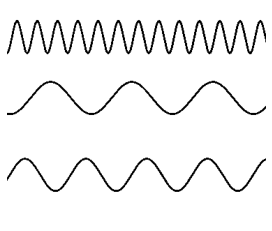

In [13]:
plt.imshow(img2bw,cmap='gray') #shwoing thresh holded image
plt.axis('off')
plt.show()

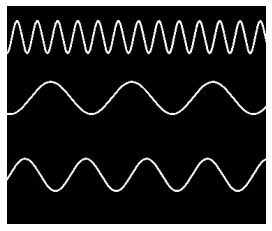

In [14]:
img2neg = cv2.bitwise_not(img2bw) #showing negative image
plt.imshow(img2neg,cmap='gray')
plt.axis('off')
plt.show()

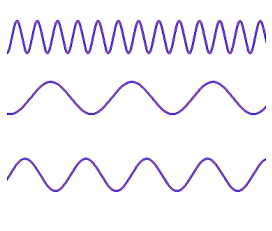

In [15]:
img2copy=img2.copy() #copying image
contours, hierarchy = cv2.findContours(img2neg,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) #finding contours
cv2.drawContours(img2copy,contours,-1,(255,0,0),1) #drawing contours
img2copy =  cv2.cvtColor(img2copy,cv2.COLOR_BGR2RGB) #showing image with contours
plt.imshow(img2copy)
plt.axis('off')
plt.show()

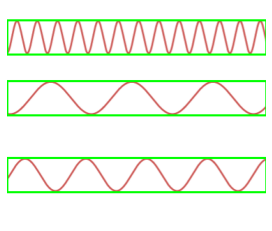

In [16]:
temp2 = img2.copy() #copying image
temp2 =  cv2.cvtColor(temp2,cv2.COLOR_BGR2RGB) #converting to RGB
for i in range(len(contours)): #loop for all contours
    x,y,w,h = cv2.boundingRect(contours[i]) #calculating bounding rectangle points aroudn each contour
    cv2.rectangle(temp2,(x,y),(x+w,y+h),(0,255,0),2) #drawing rectangle
plt.imshow(temp2) #showing image with bounding rectangle
plt.axis('off')
plt.show()

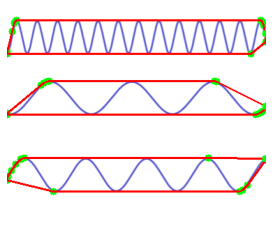

In [17]:
temp5=img2.copy() #copying image
count=0 #to count convext hull points
ar=np.zeros(len(contours)) #array
for i in range(len(contours)): #loop
    cnt = contours[i] #each contours id
    hull = cv2.convexHull(cnt,returnPoints = False) #finding convexHull for each contour
    defects = cv2.convexityDefects(cnt,hull) #find convexity defect for each contour
    count=0 #putting count = 0 for each new contour
    hull = cv2.convexHull(cnt) #points for convexity hull
    for j in range(len(hull)): #loop for all convexity defects
        p = hull[j] #point for jth hull
        cv2.drawContours(temp5, [hull],-1,(255,0,0),2) #drawing all contours
        cv2.circle(temp5,(p[0][0],p[0][1]),5,(0,255,0),-1) #drawing circles on convexity hull
        count=count+1 #incrementing count
    ar[i]=count #ar stores each contour convexity hull points
ar=ar.astype(int) #converting array to integer type
plt.imshow(temp5) #shwoing image with convexity hull points
plt.axis('off')
plt.show()

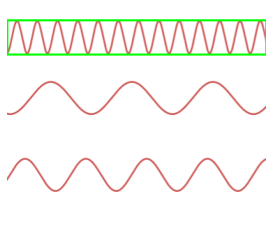

In [18]:
maxcontourid =0 #variable to store maximum hull points contour id
maxcontour=ar[0] #varible to store maximum hull points for each contour
for i in range(len(ar)): #loo[ for each contour]
    if(ar[i] < maxcontour):    #checking maximum contour
        maxcontourid = i #if condition is true then changing maximum contour id
temp6=img2.copy() #copying image
temp6 =  cv2.cvtColor(temp6,cv2.COLOR_BGR2RGB) #converting to RGB
x,y,w,h = cv2.boundingRect(contours[maxcontourid]) #bounding rectanlge points for maximum hull points contour
cv2.rectangle(temp6,(x,y),(x+w,y+h),(0,255,0),2) #drawing rectangle for maximum hull poiints contour
plt.imshow(temp6) #dhwoing image with maximum wavelength
plt.axis('off')
plt.show()

<h1>Question 3</h1>

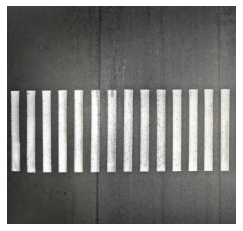

In [19]:
#Q3
path3 = r'F:\Study\Fall 2021\DIP\Assignments\3\data\img3.png'#image path
img3 = cv2.imread(path3, cv2.IMREAD_COLOR)#reading image
img3blur = cv2.GaussianBlur(img3,(3,3),1.0)#applying guassian blur
img3gray =  cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)#converting image to gray scale
threshold, img3bw = cv2.threshold(img3gray, 130, 255, cv2.THRESH_BINARY)  #thresh holding the image
img3rgb =  cv2.cvtColor(img3,cv2.COLOR_BGR2RGB) #converting image to rgb
plt.imshow(img3rgb) #shwoing image
plt.axis('off')
plt.show()

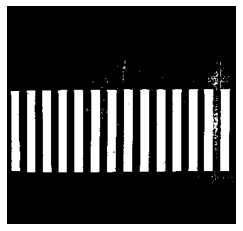

In [20]:
plt.imshow(img3bw,cmap='gray') #showing negative image
plt.axis('off')
plt.show()

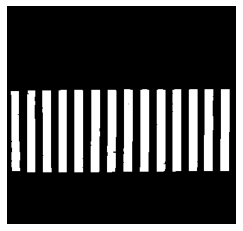

In [21]:
kernel = np.ones((3,3), np.uint8) #structuring element
img3_erosion = cv2.erode(img3bw, kernel, iterations=2) #applying errosion 2 times
img3_dilate = cv2.dilate(img3_erosion, kernel, iterations=2) #applying dilation 2 times
plt.imshow(img3_dilate,cmap='gray') #shwoing image after errosion and dilation
plt.axis('off')
plt.show()

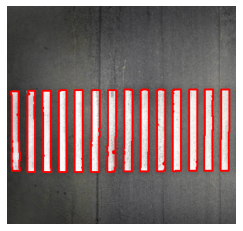

In [22]:
temp7=img3.copy() #copying image
contours, hierarchy = cv2.findContours(img3_dilate,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) #finding contours
if(len(contours)<=0): #if contours not found
    print('Not found')
for i in range(len(contours)): #loop for each contour
    x,y,w,h = cv2.boundingRect(contours[i]) #calculating bounding rectangel points for each contour
    aspectRatio = w/h #calculting aspect ratio
    if(aspectRatio>=0.05 and h>100): #condition for zebra crossing
         cv2.drawContours(temp7,contours,i,(0,0,255),2) #if condition is true then draw contours
temp7 =  cv2.cvtColor(temp7,cv2.COLOR_BGR2RGB) #converting to RGB
plt.imshow(temp7) #showing image with detected zebra crossings
plt.axis('off')
plt.show()

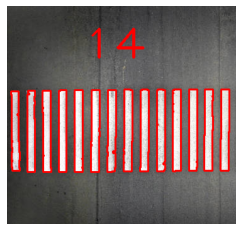

In [23]:
height=temp7.shape[0]//4 #image height divided by 4
width=temp7.shape[1]//3 #image width divided by 3
cv2.putText(temp7,str(len(contours)),(width,height),cv2.FONT_HERSHEY_PLAIN,5,(255,0,0),3) #showing number of zebra crossings on the image
plt.imshow(temp7) #shwoing image with contours and zebra crossings count
plt.axis('off')
plt.show()

<h1>Question 4</h1>

In [24]:
#Q4
path4 = r'F:\Study\Fall 2021\DIP\Assignments\3\data\animation.mp4' #video path
cap=cv2.VideoCapture(path4) #openCV function to read video
while True:
    success,img4=cap.read() #reading image from video
    temp8=img4.copy() #copying image
    img4gray =  cv2.cvtColor(img4,cv2.COLOR_BGR2GRAY) #converting image to gray scale
    threshold, img4bw = cv2.threshold(img4gray, 120, 255, cv2.THRESH_BINARY)   #thresh holding the image
    img4rgb =  cv2.cvtColor(img4,cv2.COLOR_BGR2RGB) #converting image to rgb
    img4neg = cv2.bitwise_not(img4bw) #making negative of image
    contours, hierarchy = cv2.findContours(img4neg,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #finding contours with hierarchy 
    for i in range(len(contours)): #loop for each contour
        cv2.drawContours(temp8,contours,i,(0,0,255),2) #drawing contours
    cv2.imshow("video",img4) #shwoing video
    if(len(contours)>2): #whenever objects are greater then 2 then check this conditon
        if(hierarchy[0][1][0]==-1 and hierarchy[0][1][1]==-1 and hierarchy[0][1][2]==2 and hierarchy[0][1][3]==0): #this hierarchy will be used to detect with the object is inside the circle of not
            break #if hierachy condition is true then pause the video
    if (cv2.waitKey(1) & 0xFF == ord('q')): #wait for keypress after each 1ms
        break